# Week 3, Day 1: Introduction to Machine Learning

## Learning Objectives
- Understand different types of Machine Learning
- Learn the ML workflow
- Understand key ML concepts
- Practice with basic ML examples

## Types of Machine Learning
1. Supervised Learning
2. Unsupervised Learning
3. Reinforcement Learning

In [6]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

## 1. Supervised Learning Example

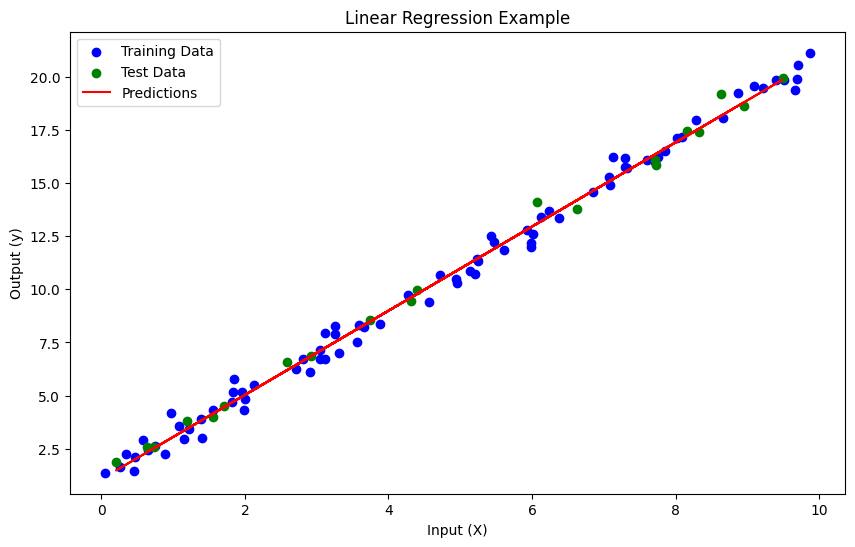

Model Coefficient: 1.98
Model Intercept: 1.07


In [7]:
def supervised_learning_example():
    # Generate synthetic data
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = 2 * X + 1 + np.random.randn(100, 1) * 0.5

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(X_test, y_pred, color='red', label='Predictions')
    plt.xlabel('Input (X)')
    plt.ylabel('Output (y)')
    plt.title('Linear Regression Example')
    plt.legend()
    plt.show()

    print(f"Model Coefficient: {model.coef_[0][0]:.2f}")
    print(f"Model Intercept: {model.intercept_[0]:.2f}")

supervised_learning_example()

## 2. Unsupervised Learning Example

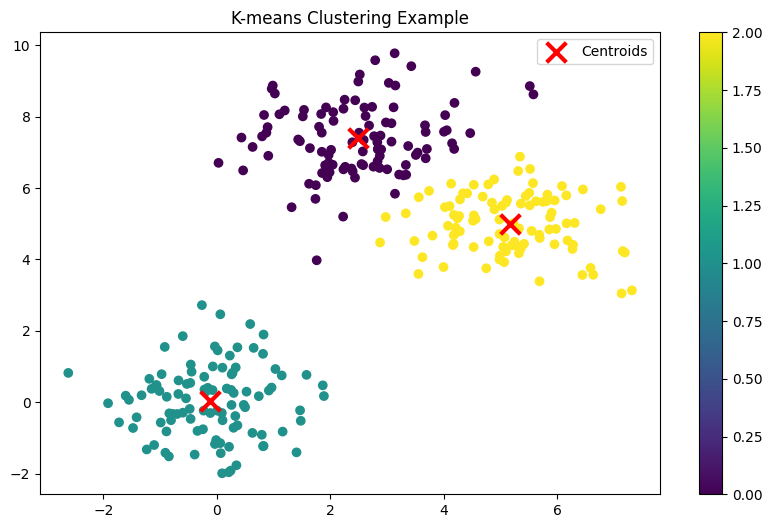

In [9]:
def unsupervised_learning_example():
    # Generate synthetic clustered data
    np.random.seed(42)

    # Create three clusters
    cluster1 = np.random.normal(0, 1, (100, 2))
    cluster2 = np.random.normal(5, 1, (100, 2))
    cluster3 = np.random.normal(2.5, 1, (100, 2)) + np.array([0, 5])

    # Combine clusters
    X = np.vstack([cluster1, cluster2, cluster3])

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Visualize results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color='red', marker='x', s=200, linewidth=3, label='Centroids')
    plt.title('K-means Clustering Example')
    plt.legend()
    plt.colorbar(scatter)
    plt.show()

unsupervised_learning_example()

## 3. Machine Learning Workflow

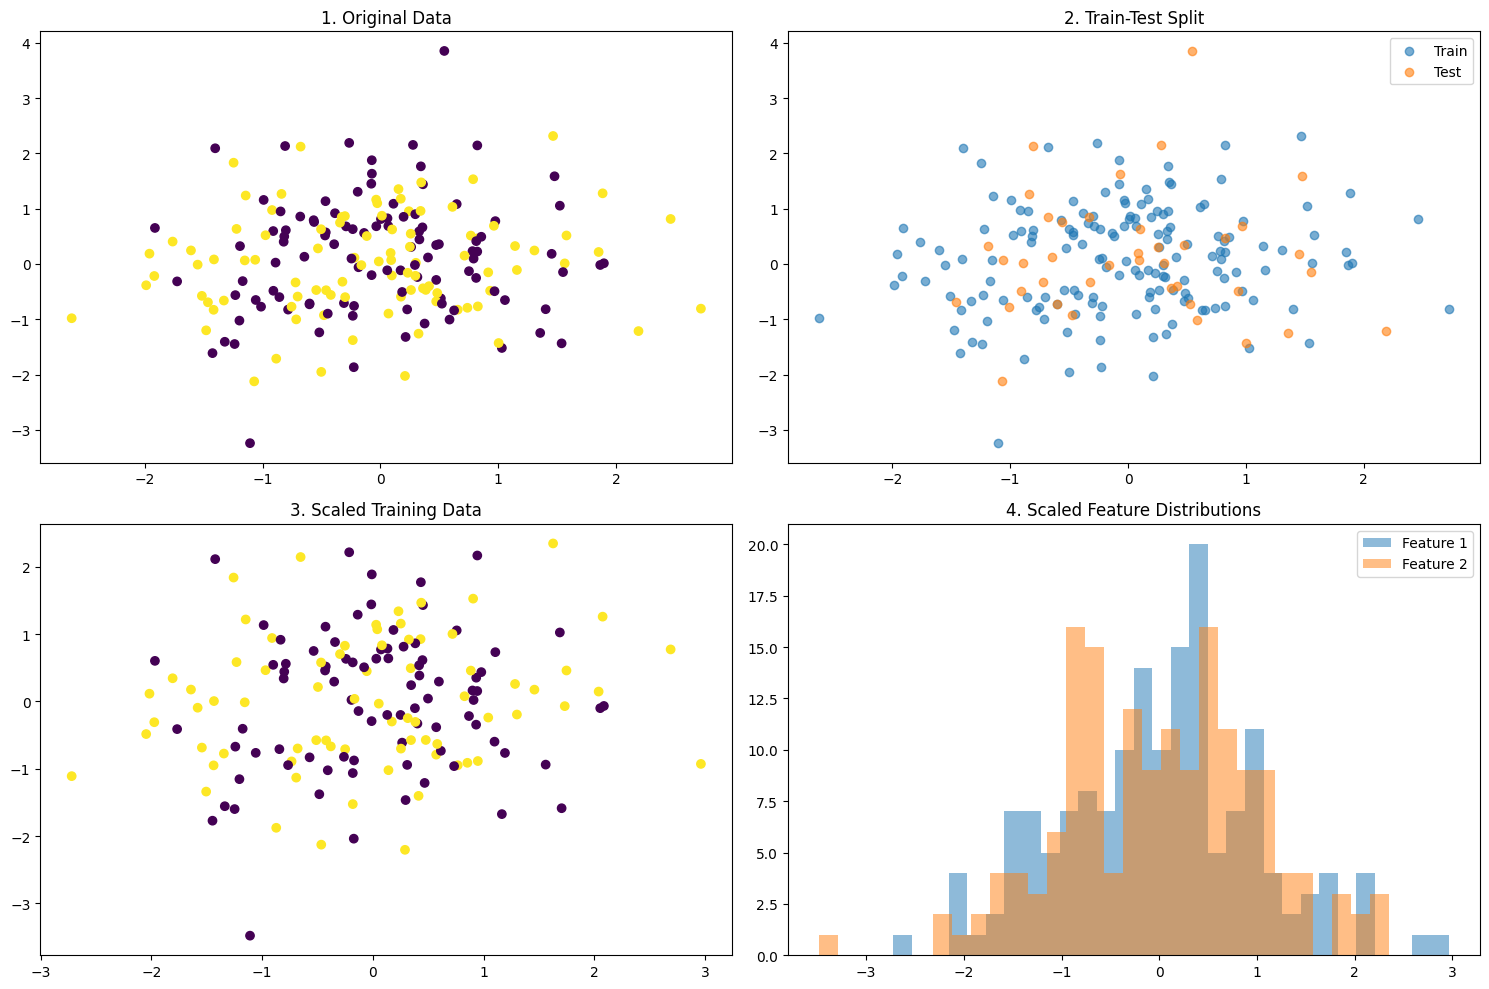

In [4]:
def ml_workflow_example():
    # 1. Data Collection/Generation
    np.random.seed(42)
    n_samples = 200

    # Generate synthetic dataset
    data = {
        'feature1': np.random.normal(0, 1, n_samples),
        'feature2': np.random.normal(0, 1, n_samples),
        'target': np.random.randint(0, 2, n_samples)
    }
    df = pd.DataFrame(data)

    # 2. Data Preprocessing
    X = df[['feature1', 'feature2']]
    y = df['target']

    # 3. Data Splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Visualize the workflow steps
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Original data
    axes[0, 0].scatter(df['feature1'], df['feature2'], c=df['target'], cmap='viridis')
    axes[0, 0].set_title('1. Original Data')

    # Training/Test split
    axes[0, 1].scatter(X_train['feature1'], X_train['feature2'],
                       label='Train', alpha=0.6)
    axes[0, 1].scatter(X_test['feature1'], X_test['feature2'],
                       label='Test', alpha=0.6)
    axes[0, 1].set_title('2. Train-Test Split')
    axes[0, 1].legend()

    # Scaled training data
    axes[1, 0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                       c=y_train, cmap='viridis')
    axes[1, 0].set_title('3. Scaled Training Data')

    # Distribution of scaled features
    axes[1, 1].hist(X_train_scaled[:, 0], bins=30, alpha=0.5, label='Feature 1')
    axes[1, 1].hist(X_train_scaled[:, 1], bins=30, alpha=0.5, label='Feature 2')
    axes[1, 1].set_title('4. Scaled Feature Distributions')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

ml_workflow_example()

## 4. Key ML Concepts

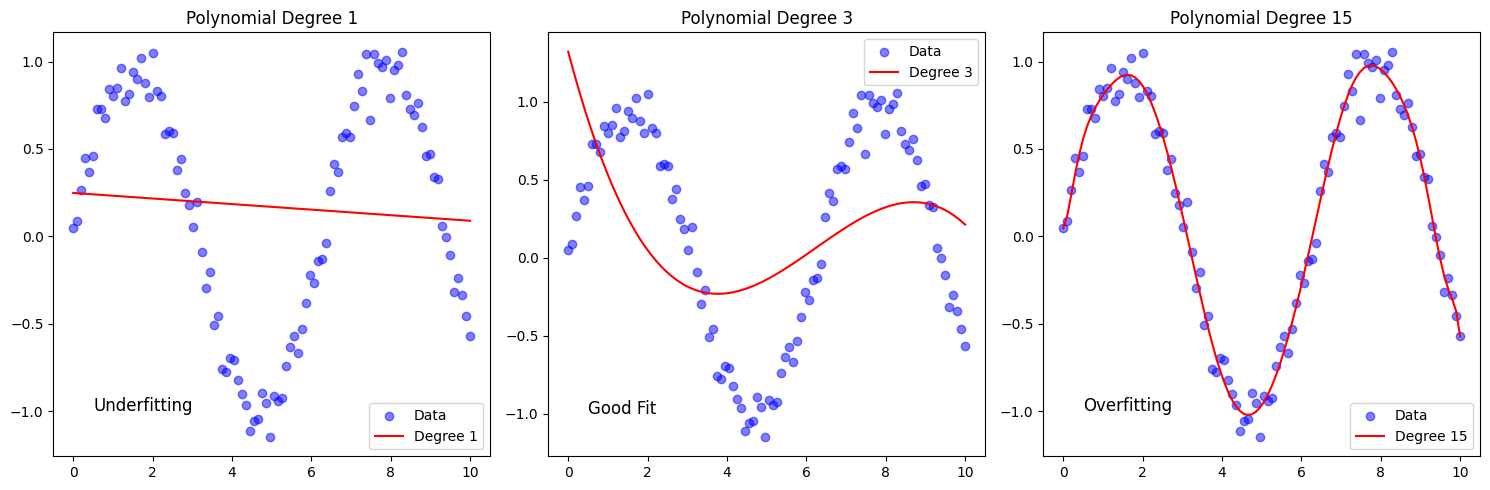

In [5]:
def demonstrate_ml_concepts():
    # Generate data to demonstrate overfitting/underfitting
    np.random.seed(42)
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

    # Fit polynomials of different degrees
    degrees = [1, 3, 15]  # Underfitting, Good fit, Overfitting
    plt.figure(figsize=(15, 5))

    for i, degree in enumerate(degrees, 1):
        plt.subplot(1, 3, i)
        coeffs = np.polyfit(X.flatten(), y.flatten(), degree)
        y_pred = np.polyval(coeffs, X.flatten())

        plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
        plt.plot(X, y_pred, color='red', label=f'Degree {degree}')
        plt.title(f'Polynomial Degree {degree}')
        if degree == 1:
            plt.text(0.5, -1, 'Underfitting', fontsize=12)
        elif degree == 3:
            plt.text(0.5, -1, 'Good Fit', fontsize=12)
        else:
            plt.text(0.5, -1, 'Overfitting', fontsize=12)
        plt.legend()

    plt.tight_layout()
    plt.show()

demonstrate_ml_concepts()

## Practical Exercises

In [ ]:
# Exercise 1: Data Preprocessing Pipeline

def preprocessing_exercise():
    # Create sample dataset with missing values and outliers
    np.random.seed(42)
    n_samples = 100

    data = {
        'feature1': np.random.normal(0, 1, n_samples),
        'feature2': np.random.normal(0, 1, n_samples),
        'target': np.random.randint(0, 2, n_samples)
    }

    # Add missing values
    data['feature1'][:10] = np.nan
    data['feature2'][5:15] = np.nan

    # Add outliers
    data['feature1'][90:95] = 10
    data['feature2'][95:] = -10

    df = pd.DataFrame(data)

    print("Original Data:")
    print(df.head())
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Task: Create a preprocessing pipeline
    # 1. Handle missing values
    # 2. Handle outliers
    # 3. Scale features

    # Your code here

preprocessing_exercise()

In [ ]:
# Exercise 2: Model Selection

def model_selection_exercise():
    # Generate different types of data
    np.random.seed(42)
    n_samples = 100

    # Linear relationship
    X_linear = np.random.rand(n_samples, 1) * 10
    y_linear = 2 * X_linear + 1 + np.random.randn(n_samples, 1) * 0.5

    # Nonlinear relationship
    X_nonlinear = np.random.rand(n_samples, 1) * 10
    y_nonlinear = np.sin(X_nonlinear) + np.random.randn(n_samples, 1) * 0.2

    # Visualize relationships
    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plt.scatter(X_linear, y_linear)
    plt.title('Linear Relationship')

    plt.subplot(122)
    plt.scatter(X_nonlinear, y_nonlinear)
    plt.title('Nonlinear Relationship')

    plt.tight_layout()
    plt.show()

    # Task: Choose appropriate models for each dataset
    # 1. Fit models
    # 2. Compare performance
    # 3. Visualize results

    # Your code here

model_selection_exercise()

## MCQ Quiz

1. Which type of learning uses labeled data?
   - a) Unsupervised learning
   - b) Supervised learning
   - c) Reinforcement learning
   - d) Semi-supervised learning

2. What is the main goal of feature scaling?
   - a) Reduce dimensionality
   - b) Handle missing values
   - c) Normalize feature ranges
   - d) Remove outliers

3. Which is NOT a type of supervised learning?
   - a) Classification
   - b) Regression
   - c) Clustering
   - d) Time series prediction

4. What is overfitting?
   - a) Model performs well on training data but poorly on test data
   - b) Model performs poorly on both training and test data
   - c) Model performs well on both training and test data
   - d) Model performs poorly on training data but well on test data

5. Why do we split data into training and test sets?
   - a) To reduce computation time
   - b) To evaluate model performance
   - c) To handle missing values
   - d) To remove outliers

6. What is the purpose of cross-validation?
   - a) Feature selection
   - b) Model evaluation
   - c) Data preprocessing
   - d) Hyperparameter tuning

7. Which algorithm is typically used for clustering?
   - a) Linear Regression
   - b) Logistic Regression
   - c) K-means
   - d) Decision Trees

8. What is the bias-variance tradeoff?
   - a) Balance between model complexity and generalization
   - b) Balance between training and test data
   - c) Balance between features and targets
   - d) Balance between preprocessing and modeling

9. Which is an example of unsupervised learning?
   - a) Spam detection
   - b) Price prediction
   - c) Customer segmentation
   - d) Face recognition

10. What is feature engineering?
    - a) Creating new features from existing ones
    - b) Selecting the best model
    - c) Splitting the dataset
    - d) Evaluating model performance

Answers: 1-b, 2-c, 3-c, 4-a, 5-b, 6-b, 7-c, 8-a, 9-c, 10-a